In [1]:
### 공유 폴더 내 드라이브에 바로가기 추가하기

# 드라이브 마운트 하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 준비하기

### 데이터 불러오기

In [2]:
# 필요한 라이브러리 불러오기

import os
import pandas as pd
import json
import numpy as np

[DAVIS](https://www.nature.com/articles/nbt.1990)



In [3]:
# 공유 폴더에 저장된 데이터 현재 폴더에 압축풀기

!unzip /content/drive/MyDrive/dataset/DAVIS.zip

Archive:  /content/drive/MyDrive/dataset/DAVIS.zip
   creating: DAVIS/
  inflating: DAVIS/affinity.txt      
  inflating: __MACOSX/DAVIS/._affinity.txt  
  inflating: DAVIS/SMILES.txt        
  inflating: __MACOSX/DAVIS/._SMILES.txt  
  inflating: DAVIS/target_seq.txt    
  inflating: __MACOSX/DAVIS/._target_seq.txt  


In [4]:
# drug - target binding affinity 데이터
affinity = pd.read_csv('/content/DAVIS/affinity.txt', header=None, sep = ' ')

# Target protein sequence 데이터
with open('/content/DAVIS/target_seq.txt') as f:
    target = json.load(f)
    target = list(target.values())

# Drug SMILES 데이터
with open('/content/DAVIS/SMILES.txt') as f:
    drug = json.load(f)
    drug = list(drug.values())

### 데이터 탐색 (Exploratory data analysis)

**Binding Affiniry**

In [5]:
affinity.shape

# 행(row): drugs
# 열(col): target

(68, 442)

In [6]:
affinity.head()

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
0,43.0,10000.0,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0,10000.0,10000.00,...,10000,10000,10000,10000,10000,10000.0,10000,230.0,10000.0,10000
1,10000.0,10000.0,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0,10000.0,10000.00,...,10000,10000,10000,10000,10000,10000.0,10000,2000.0,10000.0,10000
2,10000.0,75.0,1.9,13.0,0.77,13.0,2.6,31.0,34.0,0.93,...,10000,10000,10000,10000,10000,260.0,1200,120.0,2.3,10000
3,10000.0,10000.0,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0,10000.0,10000.00,...,10000,10000,10000,10000,10000,10000.0,10000,10000.0,10000.0,10000
4,10000.0,420.0,2900.0,750.0,580.00,230.0,500.0,500.0,1200.0,790.00,...,10000,10000,10000,10000,10000,10000.0,10000,10000.0,10000.0,10000


In [7]:
affinity.describe()

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,6305.710294,4786.038882,6776.396029,6157.742956,5368.200176,5076.213941,3662.326721,4603.582397,4621.454015,4351.749309,...,8199.426471,9174.279412,8509.647059,8989.588235,9681.838235,5118.126471,8046.602941,3241.946765,6886.200000,8798.838235
std,4502.267160,4755.621867,4071.977775,4317.135465,4538.166881,4586.191949,4403.584967,4605.842183,4752.974206,4717.341321,...,3384.862965,2458.183712,3181.048615,2741.635062,1683.615935,4627.492704,3430.533809,4272.287089,4264.491886,2973.932873
min,1.200000,0.047000,0.100000,0.041000,0.032000,0.019000,0.025000,0.046000,0.016000,0.037000,...,71.000000,57.000000,13.000000,24.000000,55.000000,0.300000,12.000000,0.520000,2.300000,16.000000
25%,892.500000,123.750000,2775.000000,1075.000000,632.500000,270.000000,45.000000,64.000000,59.000000,99.250000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,260.000000,7100.000000,50.250000,1775.000000,10000.000000
50%,10000.000000,2050.000000,10000.000000,10000.000000,4250.000000,2800.000000,960.000000,2500.000000,1800.000000,865.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,4350.000000,10000.000000,490.000000,10000.000000,10000.000000
75%,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
max,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000


**Target protein & Drug**

In [8]:
print(f"총 protein 개수: {len(target)}")
print(f"총 drug 개수: {len(drug)}")

총 protein 개수: 442
총 drug 개수: 68


In [9]:
print("Target protein sequence 예시: ")
print(target[0])
print("Drug SMILES 예시: ")
print(drug[0])

Target protein sequence 예시: 
MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNLARSLLLVDQLIDL
Drug SMIL

### 데이터 전처리 (Data pre-processing)

**데이터 프레임 만들기**

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
# SMILES - Target - Affinity paired list 만들기

SMILES = []
Target_seq = []
y = []

for i in range(len(drug)):
  for j in range(len(target)):
    SMILES.append(drug[i])
    Target_seq.append(target[j])
    y.append(affinity.values[i, j])

In [12]:
# Binding affinity cutoff로 affinity 이진화(binary)하기

threshold = 300 # Binding affinity cutoff

y = [1 if i else 0 for i in np.array(y) < threshold]

In [13]:
# 모든 데이터 하나의 데이터 프레임으로 만들기

All_Data_dictionary = {"SMILES": SMILES,
                        "Target Sequence": Target_seq,
                        "Label":y}

df_data = pd.DataFrame(All_Data_dictionary)

In [14]:
df_data

,SMILES,Target Sequence,Label
0,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,1
1,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0
2,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0
3,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0
4,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0
...,...,...,...
30051,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,0
30052,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,0
30053,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,0
30054,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,0


In [15]:
print(f'전체 drug-target pair 수: {str(len(df_data))}')

전체 drug-target pair 수: 30056


In [16]:
# Label 비율 확인

import seaborn as sns
import matplotlib.pyplot as plt

counts = df_data['Label'].value_counts() # label counts
counts

Label
0    26434
1     3622
Name: count, dtype: int64

Text(0, 0.5, 'Counts')

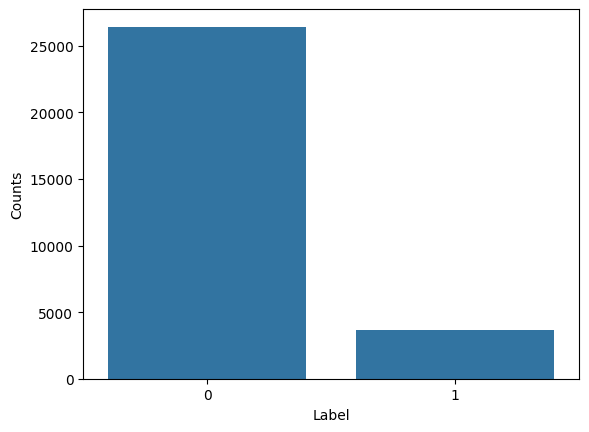

In [18]:
x = np.array([0,1])

ax = plt.subplot()
sns.barplot(x = x, y = counts)
ax.set_xticks(x)

plt.xlabel("Label")
plt.ylabel("Counts")

**학습에 사용할 수 있도록 데이터 정제**

In [19]:
### 데이터 정제를 위한 설정

# 아미노산 charater 정의
amino_char = ['?', 'A', 'C', 'B', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'M', 'L', 'O',
       'N', 'Q', 'P', 'S', 'R', 'U', 'T', 'W', 'V', 'Y', 'X', 'Z']

# SMILES character 정의
smiles_char = ['?', '#', '%', ')', '(', '+', '-', '.', '1', '0', '3', '2', '5', '4',
       '7', '6', '9', '8', '=', 'A', 'C', 'B', 'E', 'D', 'G', 'F', 'I',
       'H', 'K', 'M', 'L', 'O', 'N', 'P', 'S', 'R', 'U', 'T', 'W', 'V',
       'Y', '[', 'Z', ']', '_', 'a', 'c', 'b', 'e', 'd', 'g', 'f', 'i',
       'h', 'm', 'l', 'o', 'n', 's', 'r', 'u', 't', 'y']

# protein, drug 원핫(one-hot) 인코더
enc_protein = OneHotEncoder().fit(np.array(amino_char).reshape(-1, 1))
enc_drug = OneHotEncoder().fit(np.array(smiles_char).reshape(-1, 1))

# Protein 최대 길이
MAX_SEQ_PROTEIN = 1000

# Drug 최대 길이
MAX_SEQ_DRUG = 100

In [20]:
def trans_drug(x):
	"""SMILES 데이터 전처리하기

	같은 크기(MAX_SEQ_DRUG)의 리스트로 만들기
	사전 정의된 character에 해당 되지 않는 값은 ?로 변환

	Args:
		x: 하나의 SMILES 데이터 (string)

	Return:
		전처리된 SMILES 데이터 리스트
	"""

	temp = list(x) # str -> list
	temp = [i if i in smiles_char else '?' for i in temp] # 사전 정의된 character에 없으면 ?로 변환

	if len(temp) < MAX_SEQ_DRUG:
		# MAX_SEQ_DRUG 보다 작으면 뒷부분을 ?로 채워서 MAX_SEQ_DRUG 길이의 리스트로 만들기
		temp = temp + ['?'] * (MAX_SEQ_DRUG-len(temp))
	else:
		# MAX_SEQ_DRUG 보다 크면 앞에서부터 MAX_SEQ_DRUG 만큼 슬라이싱
		temp = temp[:MAX_SEQ_DRUG]

	return temp


In [21]:
def trans_protein(x):
	"""Protein sequence 데이터 전처리하기

	같은 크기(MAX_SEQ_PROTEIN)의 리스트로 만들기
	사전 정의된 character에 해당 되지 않는 값은 ?로 변환

	Args:
		x: 하나의 sequence 데이터 (string)

	Return:
		전처리된 SMILES 데이터 리스트
	"""

	temp = list(x.upper()) # 대문자로 바꾸기
	temp = [i if i in amino_char else '?' for i in temp] #

	if len(temp) < MAX_SEQ_PROTEIN:
		# MAX_SEQ_PROTEIN 보다 작으면 뒷부분을 ?로 채워서 MAX_SEQ_DRUG 길이의 리스트로 만들기
		temp = temp + ['?'] * (MAX_SEQ_PROTEIN-len(temp))
	else:
		# MAX_SEQ_PROTEIN 보다 크면 앞에서부터 MAX_SEQ_DRUG 만큼 슬라이싱
		temp = temp [:MAX_SEQ_PROTEIN]

	return temp

In [22]:
# Drug 데이터 중 중복되지 않는 것만 processing
unique_drug = pd.Series(df_data["SMILES"].unique()).apply(trans_drug)

# raw SMILES - processed SMILES 딕셔너리
unique_dict = dict(zip(df_data["SMILES"].unique(), unique_drug))

# 전체 데이터 processing
df_data["drug_encoding"] = [unique_dict[i] for i in df_data["SMILES"]]

In [23]:
# Protein 데이터 중 중복되지 않는 것만 processing
AA = pd.Series(df_data["Target Sequence"].unique()).apply(trans_protein)

# raw protein - processed protein 딕셔너리
AA_dict = dict(zip(df_data["Target Sequence"].unique(), AA))

# 전체 데이터 processing
df_data["target_encoding"] = [AA_dict[i] for i in df_data["Target Sequence"]]

In [24]:
df_data

,SMILES,Target Sequence,Label,drug_encoding,target_encoding
0,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,1,"[C, C, 1, =, C, 2, C, =, C, (, C, =, C, C, 2, ...","[M, K, K, F, F, D, S, R, R, E, Q, G, G, S, G, ..."
1,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0,"[C, C, 1, =, C, 2, C, =, C, (, C, =, C, C, 2, ...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."
2,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0,"[C, C, 1, =, C, 2, C, =, C, (, C, =, C, C, 2, ...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."
3,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0,"[C, C, 1, =, C, 2, C, =, C, (, C, =, C, C, 2, ...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."
4,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0,"[C, C, 1, =, C, 2, C, =, C, (, C, =, C, C, 2, ...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."
...,...,...,...,...,...
30051,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,0,"[C, 1, =, C, C, =, C, 2, C, (, =, C, 1, ), C, ...","[M, G, C, I, K, S, K, E, N, K, S, P, A, I, K, ..."
30052,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,0,"[C, 1, =, C, C, =, C, 2, C, (, =, C, 1, ), C, ...","[M, A, H, L, R, G, F, A, N, Q, H, S, R, V, D, ..."
30053,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,0,"[C, 1, =, C, C, =, C, 2, C, (, =, C, 1, ), C, ...","[M, S, S, M, P, K, P, E, R, H, A, E, S, L, L, ..."
30054,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,0,"[C, 1, =, C, C, =, C, 2, C, (, =, C, 1, ), C, ...","[M, S, S, L, G, A, S, F, V, Q, I, K, F, D, D, ..."


**데이터 나누기 (Train / Validation / Test)**

In [25]:
def create_fold(df, fold_seed, frac):
    """Train / Val / Test 나누기

    Args:
        df: 전체 데이터 (Pandas DataFrame)
        fold_seed: random_state for random sampling
        frac: train - val - test fraction (list or tuple) ex) [0.7,0.1,0.2]

    Returns:
        Train / Val / Test dataframe (tuple)
    """
    train_frac, val_frac, test_frac = frac

    # Test 데이터 random sampling
    test = df.sample(frac = test_frac, replace = False, random_state = fold_seed)
    train_val = df[~df.index.isin(test.index)] # Train & Validation 데이터

    # Validation 데이터 random sampling
    val = train_val.sample(frac = val_frac/(1-test_frac), replace = False, random_state = 1)
    train = train_val[~train_val.index.isin(val.index)] # Train 데이터

    return train, val, test

In [26]:
train, val, test = create_fold(df_data, 22, [0.7,0.1,0.2])

In [27]:
# 잘 나누어졌는지 확인

print(f'Train 데이터 크기: {len(train)}')
print(f'Validation 데이터 크기: {len(val)}')
print(f'Test 데이터 크기: {len(test)}')

Train 데이터 크기: 21039
Validation 데이터 크기: 3006
Test 데이터 크기: 6011


In [28]:
train

,SMILES,Target Sequence,Label,drug_encoding,target_encoding
2,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0,"[C, C, 1, =, C, 2, C, =, C, (, C, =, C, C, 2, ...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."
5,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0,"[C, C, 1, =, C, 2, C, =, C, (, C, =, C, C, 2, ...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."
6,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0,"[C, C, 1, =, C, 2, C, =, C, (, C, =, C, C, 2, ...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."
7,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0,"[C, C, 1, =, C, 2, C, =, C, (, C, =, C, C, 2, ...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."
9,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,0,"[C, C, 1, =, C, 2, C, =, C, (, C, =, C, C, 2, ...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."
...,...,...,...,...,...
30049,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MGGNHSHKPPVFDENEEVNFDHFQILRAIGKGSFGKVCIVQKRDTK...,0,"[C, 1, =, C, C, =, C, 2, C, (, =, C, 1, ), C, ...","[M, G, G, N, H, S, H, K, P, P, V, F, D, E, N, ..."
30051,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,0,"[C, 1, =, C, C, =, C, 2, C, (, =, C, 1, ), C, ...","[M, G, C, I, K, S, K, E, N, K, S, P, A, I, K, ..."
30052,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,0,"[C, 1, =, C, C, =, C, 2, C, (, =, C, 1, ), C, ...","[M, A, H, L, R, G, F, A, N, Q, H, S, R, V, D, ..."
30053,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,0,"[C, 1, =, C, C, =, C, 2, C, (, =, C, 1, ), C, ...","[M, S, S, M, P, K, P, E, R, H, A, E, S, L, L, ..."


In [29]:
val

,SMILES,Target Sequence,Label,drug_encoding,target_encoding
8608,CC(C(=O)O)O.CN1CCN(CC1)C2=CC3=C(C=C2)NC(=C4C(=...,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,1,"[C, C, (, C, (, =, O, ), O, ), O, ., C, N, 1, ...","[M, G, C, G, C, S, S, H, P, E, D, D, W, M, E, ..."
27230,CC(C)OC1=CC=C(C=C1)NC(=O)N2CCN(CC2)C3=NC=NC4=C...,MFPLIGKTIIFDNFPDPSDTWEITETIGKGTYGKVFKVLNKKNGQK...,0,"[C, C, (, C, ), O, C, 1, =, C, C, =, C, (, C, ...","[M, F, P, L, I, G, K, T, I, I, F, D, N, F, P, ..."
14040,CC12C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8...,MATCIGEKIEDFKVGNLLGKGSFAGVYRAESIHTGLEVAIKMIDKK...,1,"[C, C, 1, 2, C, (, C, C, (, O, 1, ), N, 3, C, ...","[M, A, T, C, I, G, E, K, I, E, D, F, K, V, G, ..."
20504,CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...,MVDMGALDNLIANTAYLQARKPSDCDSKELQRRRRSLALPGLQGCA...,0,"[C, S, (, =, O, ), (, =, O, ), N, 1, C, C, N, ...","[M, V, D, M, G, A, L, D, N, L, I, A, N, T, A, ..."
17422,CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)N3C=C(N=C3)...,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0,"[C, C, 1, =, C, (, C, =, C, (, C, =, C, 1, ), ...","[M, E, R, P, P, G, L, R, P, G, A, G, G, P, W, ..."
...,...,...,...,...,...
10480,C1CC(=NO)C2=C1C=C(C=C2)C3=CN(N=C3C4=CC=NC=C4)CCO,TMPPRPSSGELWGIHLMPPRILVECLLPNGMIVTLECLREATLITI...,0,"[C, 1, C, C, (, =, N, O, ), C, 2, =, C, 1, C, ...","[T, M, P, P, R, P, S, S, G, E, L, W, G, I, H, ..."
17736,CN1C2=NC(=NC=C2C=C(C1=O)C3=C(C=CC=C3Cl)Cl)NC4=...,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0,"[C, N, 1, C, 2, =, N, C, (, =, N, C, =, C, 2, ...","[M, A, T, T, A, T, C, T, R, F, T, D, D, Y, Q, ..."
16058,CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...,MCTVVDPRIVRRYLLRRQLGQGAYGIVWKAVDRRTGEVVAIKKIFD...,0,"[C, C, 1, 2, C, (, C, (, C, C, (, O, 1, ), N, ...","[M, C, T, V, V, D, P, R, I, V, R, R, Y, L, L, ..."
7082,CC(C1=C(C=CC(=C1Cl)F)Cl)OC2=C(N=CC(=C2)C3=CN(N...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,1,"[C, C, (, C, 1, =, C, (, C, =, C, C, (, =, C, ...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."


In [30]:
test

,SMILES,Target Sequence,Label,drug_encoding,target_encoding
4162,CCN(CCCOC1=CC2=C(C=C1)C(=NC=N2)NC3=NNC(=C3)CC(...,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0,"[C, C, N, (, C, C, C, O, C, 1, =, C, C, 2, =, ...","[M, E, R, P, P, G, L, R, P, G, A, G, G, P, W, ..."
24426,CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0,"[C, N, C, (, =, O, ), C, 1, =, N, C, =, C, C, ...","[M, R, P, S, G, T, A, G, A, A, L, L, A, L, L, ..."
18231,CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=...,MHTGGETSACKPSSVRLAPSFSFHAAGLQMAGQMPHSHQYSDRRQP...,0,"[C, C, 1, =, C, (, N, C, (, =, C, 1, C, (, =, ...","[M, H, T, G, G, E, T, S, A, C, K, P, S, S, V, ..."
23630,CC1=C(NC(=C1C(=O)NCC(CN2CCOCC2)O)C)C=C3C4=C(C=...,MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDL...,1,"[C, C, 1, =, C, (, N, C, (, =, C, 1, C, (, =, ...","[M, R, G, A, R, G, A, W, D, F, L, C, V, L, L, ..."
17657,CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)N3C=C(N=C3)...,MDVSLCPAKCSFWRIFLLGSVWLDYVGSVLACPANCVCSKTEINCR...,0,"[C, C, 1, =, C, (, C, =, C, (, C, =, C, 1, ), ...","[M, D, V, S, L, C, P, A, K, C, S, F, W, R, I, ..."
...,...,...,...,...,...
20278,CC1=C(C=C(C=C1)NC2=NC=CC(=N2)N(C)C3=CC4=NN(C(=...,MAGFKRGYDGKIAGLYDLDKTLGRGHFAVVKLARHVFTGEKVAVKV...,0,"[C, C, 1, =, C, (, C, =, C, (, C, =, C, 1, ), ...","[M, A, G, F, K, R, G, Y, D, G, K, I, A, G, L, ..."
5492,CN1C2=C(C=C(C=C2)OC3=CC(=NC=C3)C4=NC=C(N4)C(F)...,MAVPSLWPWGACLPVIFLSLGFGLDTVEVCPSLDIRSEVAELRQLE...,0,"[C, N, 1, C, 2, =, C, (, C, =, C, (, C, =, C, ...","[M, A, V, P, S, L, W, P, W, G, A, C, L, P, V, ..."
16057,CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...,MAEPLKEEDGEDGSAEPPGPVKAEPAHTAASVAAKNLALLKARSFD...,0,"[C, C, 1, 2, C, (, C, (, C, C, (, O, 1, ), N, ...","[M, A, E, P, L, K, E, E, D, G, E, D, G, S, A, ..."
15777,CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C...,MAYSWQTDPNPNESHEKQYEHQEFLFVNQPHSSSQVSLGFDQIVDE...,0,"[C, C, 1, =, C, (, C, =, C, (, C, =, C, 1, ), ...","[M, A, Y, S, W, Q, T, D, P, N, P, N, E, S, H, ..."


**Drug & Protein encoding 함수**

In [31]:
# Drug one-hot 인코딩

def drug_2_embed(x):
	return enc_drug.transform(np.array(x).reshape(-1,1)).toarray().T


In [32]:
# Protein one-hot 인코딩

def protein_2_embed(x):
	return enc_protein.transform(np.array(x).reshape(-1,1)).toarray().T

# 학습을 위한 준비

### DataLoader

In [33]:
# 필요한 library 불러오기

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable


In [34]:
# 디바이스 설정

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"현재 디바이스는 {device} 입니다.")

현재 디바이스는 cuda:0 입니다.


In [35]:
# Custom dataset 만들기

class data_process_loader(Dataset):
    def __init__(self, df):
        """
        Args:
            df: Paired drug - protein - affinity dataframe
        """
        self.df = df

    def __len__(self):
        """샘플 개수
        """
        return self.df.shape[0]

    def __getitem__(self, index):
        # Drug 데이터
        v_d = self.df.iloc[index]['drug_encoding']
        v_d = drug_2_embed(v_d) # Drug One-hot 인코딩 [63,100]

        # Target 데이터
        v_p = self.df.iloc[index]['target_encoding']
        v_p = protein_2_embed(v_p) # Target One-hot 인코딩 [26,100]

        # Binding affinity (label)
        y = self.df.iloc[index]['Label']

        return v_d, v_p, y


In [36]:
train_dataset = data_process_loader(train)
valid_dataset = data_process_loader(val)
test_dataset = data_process_loader(test)

In [37]:
# Dataset 확인 해보기

for (v_d, v_p, y) in valid_dataset:
    print(v_d.shape)
    print(v_p.shape)
    print(y)
    break

(63, 100)
(26, 1000)
1


In [38]:
# DataLoader 파라미터

params = {'batch_size': 256,
            'shuffle': True,
            'num_workers': 1,
            'drop_last': False}

In [39]:
# Mini-batch 학습을 위한 DataLoader

training_generator = DataLoader(train_dataset, **params)
valid_generator = DataLoader(valid_dataset, **params)
test_generator = DataLoader(test_dataset, **params)

In [40]:
# Dataloader 확인해보기

for (v_d, v_p, y) in training_generator:
    print(v_d.shape)
    print(v_p.shape)
    print(y)

    drug_demo = v_d
    protein_demo = v_p
    affinity_demo = y
    break

torch.Size([256, 63, 100])
torch.Size([256, 26, 1000])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])


In [41]:
for (v_d, v_p, y) in valid_generator:
    print(v_d.shape)
    print(v_p.shape)
    print(y)
    break

torch.Size([256, 63, 100])
torch.Size([256, 26, 1000])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])


In [42]:
for (v_d, v_p, y) in test_generator:
    print(v_d.shape)
    print(v_p.shape)
    print(y)
    break

torch.Size([256, 63, 100])
torch.Size([256, 26, 1000])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Binding affinity 예측 모델 만들기

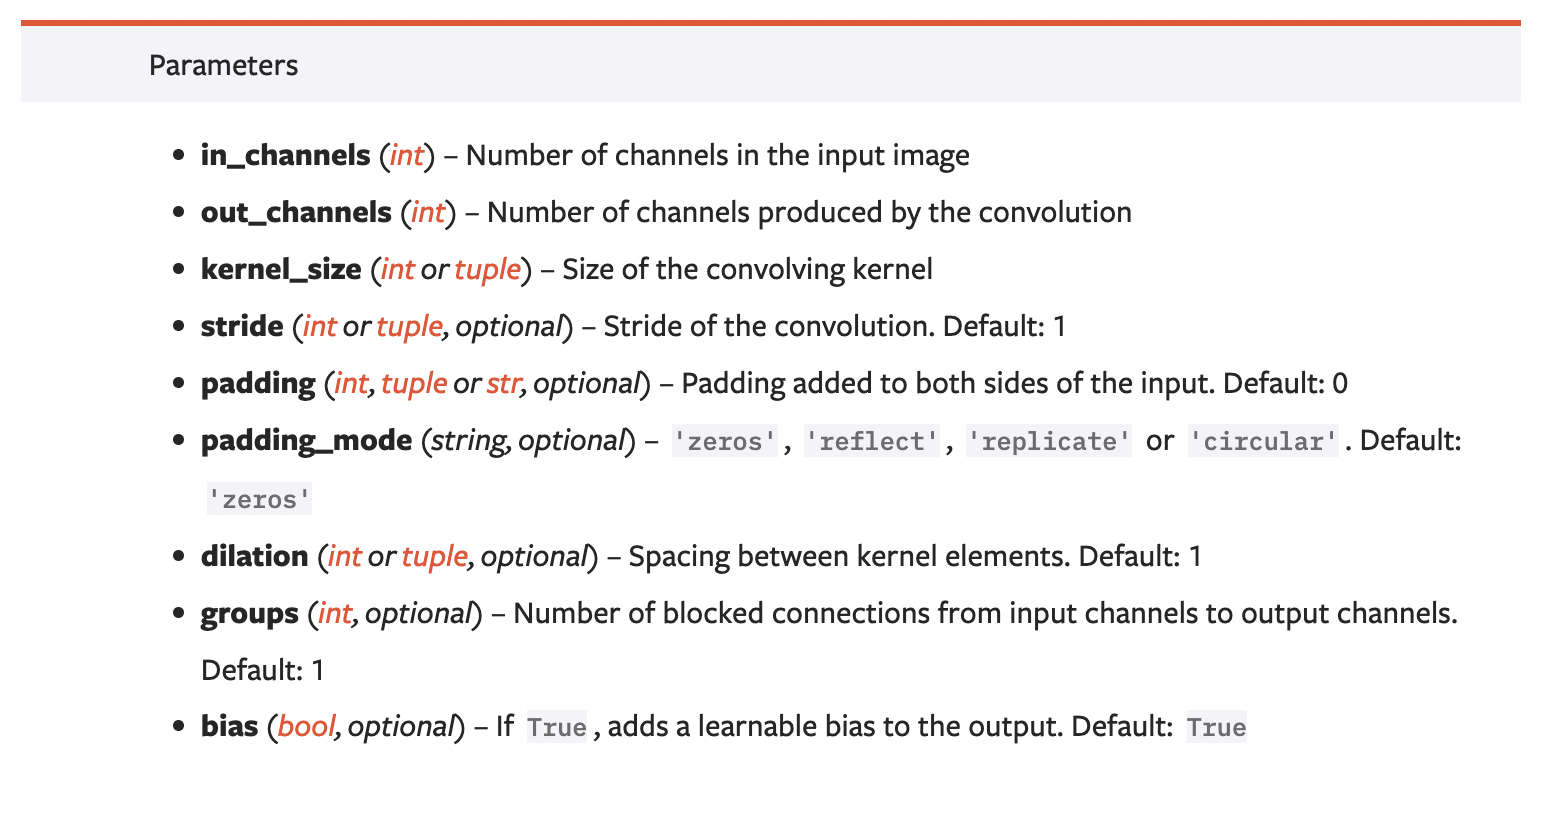

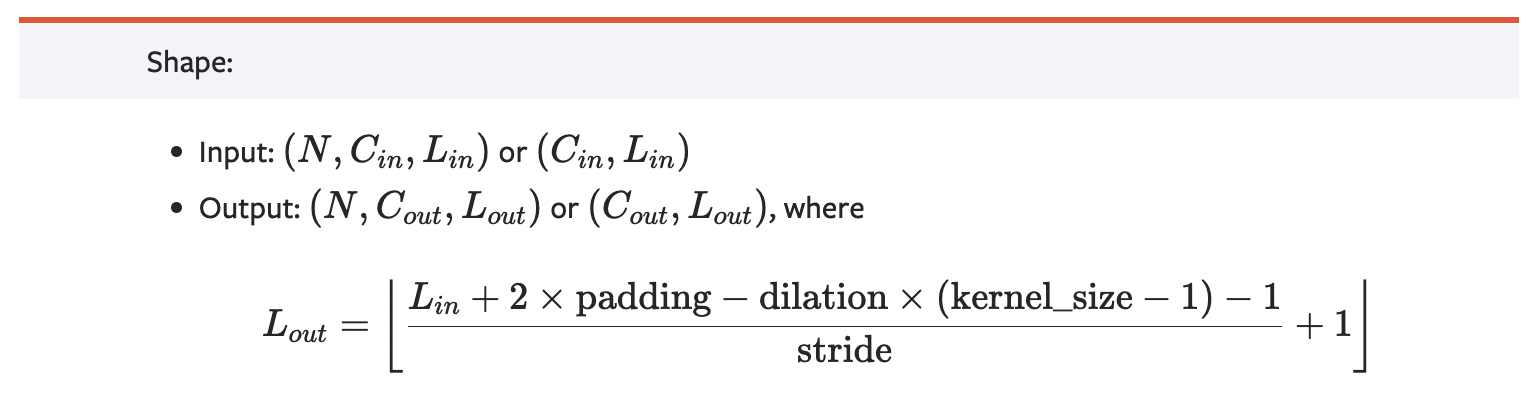

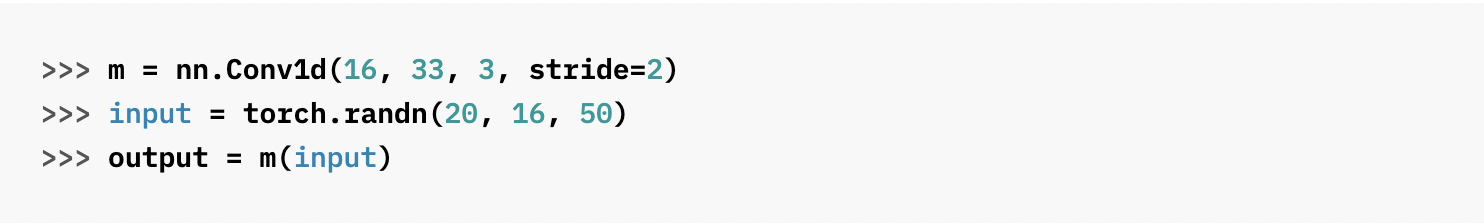

In [43]:
### Drug data

# input data
inp = drug_demo.double()
print(f"Input: {list(inp.shape)}")

# 1D convolution 적용하기
conv1 = nn.Conv1d(in_channels = 63, out_channels = 32, kernel_size = 4).double()
drug_after_conv1 = F.relu(conv1(inp))
print(f"Conv1: {list(drug_after_conv1.shape)}")

conv2 = nn.Conv1d(in_channels = 32, out_channels = 64, kernel_size = 6).double()
drug_after_conv2 = F.relu(conv2(drug_after_conv1))
print(f"Conv2: {list(drug_after_conv2.shape)}")

conv3 = nn.Conv1d(in_channels = 64, out_channels = 96, kernel_size = 8).double()
drug_after_conv3 = F.relu(conv3(drug_after_conv2))
print(f"Conv3: {list(drug_after_conv3.shape)}")

# # max pooling
# pooled = F.adaptive_max_pool1d(drug_after_conv3, output_size=1)
# print(f"Pooled: {list(pooled.shape)}")

# # Linear embedding
# fc = nn.Linear(96, 256)
# pooled = pooled.view(pooled.size(0), -1) # [256, 96, 1] -> [256, 96]
# final = fc(pooled.float())
# print(f"Final: {list(final.shape)}")

Input: [256, 63, 100]
Conv1: [256, 32, 97]
Conv2: [256, 64, 92]
Conv3: [256, 96, 85]


**RNN demo**

![](https://drive.google.com/uc?export=view&id=1EuDsl60ET7-XC8Qyj2HEbQqDgBjmZRuG)

![](https://drive.google.com/uc?export=view&id=1rKtlq4W5H3Tu7Z-X4xDjhP-7z-Z60doB)



In [44]:
### Drug data

rnn_drug_n_layers = 2
rnn_drug_hid_dim = 64
hidden_dim_drug = 256

rnn = nn.GRU(input_size = 96, # input feature 사이즈 (마지막 convolution 이 후 채널 개수)
            hidden_size = rnn_drug_hid_dim, # hidden feature 사이즈
            num_layers = rnn_drug_n_layers, # recurrent layer 개수
            batch_first = True, # If True, (batch, seq, feature) Else, (seq, batch, feature)
            bidirectional = True) # If True, Bidirectional LSTM

rnn = rnn.double()

emb = drug_after_conv3

batch_size = emb.size(0)
emb = emb.view(batch_size, emb.size(2), -1)
print(f"RNN 입력값: {list(emb.shape)}")
# [256, 96, 85] -> [256, 85, 96]

# GRU
direction = 2

h0 = torch.randn(rnn_drug_n_layers * direction, batch_size, rnn_drug_hid_dim).double() # Initialize hidden state
print(f"hidden state: {list(h0.shape)}") # hidden state
v, hn = rnn(emb, h0)

print(f"RNN 출력값: {list(v.shape)}")

# Linear embedding
fc1 = nn.Linear(rnn_drug_hid_dim * direction * 85, hidden_dim_drug)
v = torch.flatten(v, 1)
v = fc1(v.float())
print(f"최종 임베딩 후 사이즈: {list(v.shape)}")

RNN 입력값: [256, 85, 96]
hidden state: [4, 256, 64]
RNN 출력값: [256, 85, 128]
최종 임베딩 후 사이즈: [256, 256]


**모델 만들기**

In [45]:
# 모델 설정 값

config = {
    # drug 설정
    "cnn_drug_filters" : [32,64,96],
    "cnn_drug_kernels" : [4,6,8],
    "hidden_dim_drug" : 256,
    "rnn_drug_hid_dim" : 64,
    "rnn_drug_n_layers" : 2,
    "rnn_drug_bidirectional" : True,
    "rnn_Use_GRU_LSTM_target" : 'GRU',

    # protein 설정
    "cnn_target_filters" : [32,64,96],
    "cnn_target_kernels" : [4,8,12],
    "hidden_dim_protein" : 256,
    "rnn_target_hid_dim" : 64,
    "rnn_target_n_layers" : 2,
    "rnn_target_bidirectional" : True,
    "rnn_Use_GRU_LSTM_drug" : 'GRU',

    # Classfier 설정
    "cls_hidden_dims" : [1024, 1024, 512]
    }

In [46]:
# CNN - RNN 모델

class CNN_RNN(nn.Sequential):
	"""CNN과 RNN을 이용하여 특성 추출(feature extration)
	"""
	def __init__(self, encoding, **config):
		super(CNN_RNN, self).__init__()

		if encoding == 'drug':
			"""
			CNN 구현
			"""
			# 레이어 별 CNN 필터 개수
			in_ch = [63] + config['cnn_drug_filters']
			self.in_ch = in_ch[-1] # 마지막 convolution 층 필터 개수

			# 레이어 별 CNN kernel 사이즈
			kernels = config['cnn_drug_kernels']

			# 전체 CNN Layer 개수
			layer_size = len(config['cnn_drug_filters'])

			self.conv = nn.ModuleList([nn.Conv1d(in_channels = in_ch[i], # input 채널 수
													out_channels = in_ch[i+1], # output 채널 수
													kernel_size = kernels[i]) for i in range(layer_size)]) # kernel 사이즈
			self.conv = self.conv.double()

			# 마지막 층 사이즈 구하기
			n_size_d = self._get_conv_output((63, 100)) # auto get the seq_len of CNN output

			"""
			RNN 구현 (LSTM / GRU)
			"""
			if config['rnn_Use_GRU_LSTM_drug'] == 'LSTM':
				self.rnn = nn.LSTM(input_size = in_ch[-1], # input feature 사이즈 (convolution 이 후 채널 개수)
								hidden_size = config['rnn_drug_hid_dim'], # hidden feature 사이즈
								num_layers = config['rnn_drug_n_layers'], # recurrent layer 개수
								batch_first = True, # If True, (batch, seq, feature) Else, (seq, batch, feature)
								bidirectional = config['rnn_drug_bidirectional']) # If True, Bidirectional LSTM

			elif config['rnn_Use_GRU_LSTM_drug'] == 'GRU':
				self.rnn = nn.GRU(input_size = in_ch[-1], # input feature 사이즈 (convolution 이 후 채널 개수)
								hidden_size = config['rnn_drug_hid_dim'], # hidden feature 사이즈
								num_layers = config['rnn_drug_n_layers'], # recurrent layer 개수
								batch_first = True, # If True, (batch, seq, feature) Else, (seq, batch, feature
								bidirectional = config['rnn_drug_bidirectional']) # If True, Bidirectional LSTM
			else:
				raise AttributeError('Please use LSTM or GRU.')

			direction = 2 if config['rnn_drug_bidirectional'] else 1
			self.rnn = self.rnn.double()

			# 마지막 drug 임베딩 층
			self.fc1 = nn.Linear(config['rnn_drug_hid_dim'] * direction * n_size_d, config['hidden_dim_drug'])

		if encoding == 'protein':
			"""
			CNN 구현
			"""
			# 레이어 별 CNN 필터 개수
			in_ch = [26] + config['cnn_target_filters']
			self.in_ch = in_ch[-1]

			# 레이어 별 CNN kernel 사이즈
			kernels = config['cnn_target_kernels']

			# 전체 CNN Layer 개수
			layer_size = len(config['cnn_target_filters'])

			self.conv = nn.ModuleList([nn.Conv1d(in_channels = in_ch[i], # input 채널 수
													out_channels = in_ch[i+1], # output 채널 수
													kernel_size = kernels[i]) for i in range(layer_size)]) # kernel 사이즈
			self.conv = self.conv.double()

			# 마지막 층 사이즈 구하기
			n_size_p = self._get_conv_output((26, 1000))

			"""
			RNN 구현 (LSTM / GRU)
			"""
			if config['rnn_Use_GRU_LSTM_target'] == 'LSTM':
				self.rnn = nn.LSTM(input_size = in_ch[-1], # input feature 사이즈 (convolution 이 후 채널 개수)
								hidden_size = config['rnn_target_hid_dim'], # hidden feature 사이즈
								num_layers = config['rnn_target_n_layers'], # recurrent layer 개수
								batch_first = True, # If True, (batch, seq, feature) Else, (seq, batch, feature)
								bidirectional = config['rnn_target_bidirectional']) # If True, Bidirectional LSTM

			elif config['rnn_Use_GRU_LSTM_target'] == 'GRU':
				self.rnn = nn.GRU(input_size = in_ch[-1],
								hidden_size = config['rnn_target_hid_dim'],
								num_layers = config['rnn_target_n_layers'],
								batch_first = True,
								bidirectional = config['rnn_target_bidirectional'])
			else:
				raise AttributeError('Please use LSTM or GRU.')

			direction = 2 if config['rnn_target_bidirectional'] else 1
			self.rnn = self.rnn.double()

			# 마지막 protein 임베딩 층
			self.fc1 = nn.Linear(config['rnn_target_hid_dim'] * direction * n_size_p, config['hidden_dim_protein'])

		self.encoding = encoding
		self.config = config

	def _get_conv_output(self, shape):
		"""마지막
		"""
		bs = 1
		input = Variable(torch.rand(bs, *shape))
		output_feat = self._forward_features(input.double())
		n_size = output_feat.data.view(bs, self.in_ch, -1).size(2)
		return n_size

	def _forward_features(self, x):
		for l in self.conv:
			x = F.relu(l(x))
		return x

	def forward(self, v):
		v = self._forward_features(v.double())

		batch_size = v.size(0)
		v = v.view(batch_size, v.size(2), -1)
  		# drug: [256, 96, 85] -> [256, 85, 96]
		# protein: [256, 96, 979] -> [256, 979, 96]

		if self.encoding == 'protein':
			if self.config['rnn_Use_GRU_LSTM_target'] == 'LSTM':
				direction = 2 if self.config['rnn_target_bidirectional'] else 1
				h0 = torch.randn(self.config['rnn_target_n_layers'] * direction, batch_size, self.config['rnn_target_hid_dim']).to(device) # Initialize hidden state
				c0 = torch.randn(self.config['rnn_target_n_layers'] * direction, batch_size, self.config['rnn_target_hid_dim']).to(device) # Initialize cell state
				v, (hn, cn) = self.rnn(v.double(), (h0.double(), c0.double()))
			else:
				# GRU
				direction = 2 if self.config['rnn_target_bidirectional'] else 1
				h0 = torch.randn(self.config['rnn_target_n_layers'] * direction, batch_size, self.config['rnn_target_hid_dim']).to(device)
				v, hn = self.rnn(v.double(), h0.double())
		else:
			if self.config['rnn_Use_GRU_LSTM_drug'] == 'LSTM':
				direction = 2 if self.config['rnn_drug_bidirectional'] else 1
				h0 = torch.randn(self.config['rnn_drug_n_layers'] * direction, batch_size, self.config['rnn_drug_hid_dim']).to(device) # Initialize hidden state
				c0 = torch.randn(self.config['rnn_drug_n_layers'] * direction, batch_size, self.config['rnn_drug_hid_dim']).to(device) # Initialize cell state
				v, (hn, cn) = self.rnn(v.double(), (h0.double(), c0.double()))
			else:
				# GRU
				direction = 2 if self.config['rnn_drug_bidirectional'] else 1
				h0 = torch.randn(self.config['rnn_drug_n_layers'] * direction, batch_size, self.config['rnn_drug_hid_dim']).to(device)
				v, hn = self.rnn(v.double(), h0.double())

		v = torch.flatten(v, 1)
		v = self.fc1(v.float())
		return v


In [47]:
class Classifier(nn.Sequential):
	"""
	임베딩 된 drug와 protein을 이용하여 classificaion
	"""
	def __init__(self, model_drug, model_protein, **config):
		"""
		Args:
			model_drug: drug emedding 모델
			model_protein: protein emedding 모델
			config: 모델 설정 값
		"""
		super(Classifier, self).__init__()

		self.input_dim_drug = config['hidden_dim_drug'] # drug feature 사이즈
		self.input_dim_protein = config['hidden_dim_protein'] # protein feature 사이즈

		self.model_drug = model_drug # drug 임베딩 모델
		self.model_protein = model_protein # protein 임베딩 모델

		self.dropout = nn.Dropout(0.1) # dropout 적용

		self.hidden_dims = config['cls_hidden_dims'] # classifier hidden dimensions
		layer_size = len(self.hidden_dims) + 1 # hidden layer 개수
		dims = [self.input_dim_drug + self.input_dim_protein] + self.hidden_dims + [1] # ["합쳐진 feature 차원 (drug + protein), hidden1, hidden2, hidden3, 1 (output layer)]

		self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)]) # classifer layers

	def forward(self, v_D, v_P):
		# Drug/protein 임베딩
		v_D = self.model_drug(v_D)
		v_P = self.model_protein(v_P)

		# drug - protein feature 합치기
		v_f = torch.cat((v_D, v_P), 1)

		for i, l in enumerate(self.predictor):
			if i == (len(self.predictor)-1):
				# If last layer,
				v_f = l(v_f)
			else:
				# If Not last layer, dropout과 ReLU 적용
				v_f = F.relu(self.dropout(l(v_f)))

		return v_f


In [48]:
# model for drug
model_drug = CNN_RNN('drug', **config)

# model for protein
model_protein = CNN_RNN('protein', **config)

# classifier
model = Classifier(model_drug, model_protein, **config)

model = model.to(device)

# 모델 학습 (Training)

### 학습 준비

In [49]:
import copy
from prettytable import PrettyTable
from time import time

from sklearn.metrics import mean_squared_error, roc_auc_score, average_precision_score, f1_score, log_loss

In [50]:
# 하이퍼 파라미터(hyper parameter)

learning_rate = 0.001
weight_decay  = 0.00001
train_epoch   = 15

In [51]:
# 옵티마이저 선언
opt = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = weight_decay) # Adam optimizer

# 손실 함수 선언
loss_fct = torch.nn.BCELoss()

# 시그모이드(sigmoid) 함수
sigmoid = torch.nn.Sigmoid()

### 모델 학습 진행

In [52]:
def get_metrics(y_label, y_pred):
    # metrics
    auc = roc_auc_score(y_label, y_pred) # AUC
    auprc = average_precision_score(y_label, y_pred) # Average Precision
    f1 = f1_score(y_label, outputs) # F1 score
    lloss = log_loss(y_label, outputs) # cross-entropy loss

    return auc, auprc, f1, lloss

In [53]:

loss_history = []

max_auc = 0 # 최고 AUC 저장
model_max = copy.deepcopy(model) # 최고 AUC 저장

valid_metric_record = [] # 각 metrics 저장
valid_metric_header = ["# epoch"]
valid_metric_header.extend(["AUROC", "AUPRC", "F1"])

table = PrettyTable(valid_metric_header)

float2str = lambda x:'%0.4f'%x  # float 자료 형 str로 만들기 (소숫점 4자리까지)

print('--- Go for Training ---')
t_start = time()


for epoch in range(train_epoch):
    # Training
    model.train()

    for i, (v_d, v_p, label) in enumerate(training_generator):
        v_p = v_p.float().to(device)
        v_d = v_d.float().to(device)

        # 순전파 (forward-pass)
        score = model(v_d, v_p)
        label = Variable(torch.from_numpy(np.array(label)).float()).to(device) # label numpy -> torch tensor

        # 모델 아웃풋 score -> probability
        n = torch.squeeze(sigmoid(score), 1)

        # 손실 값(loss) 계산
        loss = loss_fct(n, label)
        loss_history.append(loss.item()) # loss 기록

        opt.zero_grad() # gradient 초기화
        loss.backward() # back propagation
        opt.step() # parameter 업데이트

    # Validation
    model.eval()
    with torch.set_grad_enabled(False):
        y_pred = []
        y_label = []

        for i, (v_d, v_p, label) in enumerate(valid_generator):
            v_p = v_p.float().to(device)
            v_d = v_d.float().to(device)

            # 순전파 (forward-pass)
            score = model(v_d, v_p)

            logits = torch.squeeze(sigmoid(score)).detach().cpu().numpy() # 예측 확률
            label_ids = label.to('cpu').numpy() # 참 값

            y_label = y_label + label_ids.flatten().tolist()
            y_pred = y_pred + logits.flatten().tolist()

    # 예측 값
    outputs = np.asarray([1 if i else 0 for i in (np.asarray(y_pred) >= 0.5)])

    # model evaluation
    auc, auprc, f1, lloss = get_metrics(y_label, y_pred)

    lst = ["epoch " + str(epoch)] + list(map(float2str,[auc, auprc, f1]))
    valid_metric_record.append(lst)

    if auc > max_auc:
        # 이전 epoch 보다 AUC 좋아지면 model_max, max_auc 갱신
        model_max = copy.deepcopy(model)
        max_auc = auc

    print('Validation at Epoch '+ str(epoch + 1) + ', AUROC: ' + str(auc)[:7] + \
            ' , AUPRC: ' + str(auprc)[:7] + ' , F1: '+str(f1)[:7] + ' , Cross-entropy Loss: ' + \
            str(lloss)[:7])


    table.add_row(lst)



--- Go for Training ---


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


Validation at Epoch 1, AUROC: 0.67876 , AUPRC: 0.20730 , F1: 0.0 , Cross-entropy Loss: 3.82499
Validation at Epoch 2, AUROC: 0.78528 , AUPRC: 0.31353 , F1: 0.0 , Cross-entropy Loss: 3.82499
Validation at Epoch 3, AUROC: 0.81834 , AUPRC: 0.37630 , F1: 0.11965 , Cross-entropy Loss: 3.70508
Validation at Epoch 4, AUROC: 0.82623 , AUPRC: 0.41414 , F1: 0.11560 , Cross-entropy Loss: 3.66911
Validation at Epoch 5, AUROC: 0.83976 , AUPRC: 0.47057 , F1: 0.46271 , Cross-entropy Loss: 3.36935
Validation at Epoch 6, AUROC: 0.85264 , AUPRC: 0.50257 , F1: 0.30958 , Cross-entropy Loss: 3.36935
Validation at Epoch 7, AUROC: 0.85698 , AUPRC: 0.50366 , F1: 0.43064 , Cross-entropy Loss: 3.29740
Validation at Epoch 8, AUROC: 0.86404 , AUPRC: 0.53008 , F1: 0.42222 , Cross-entropy Loss: 3.11754
Validation at Epoch 9, AUROC: 0.86447 , AUPRC: 0.51784 , F1: 0.46090 , Cross-entropy Loss: 3.14152
Validation at Epoch 10, AUROC: 0.88059 , AUPRC: 0.55100 , F1: 0.46502 , Cross-entropy Loss: 3.11754
Validation at Epo

# 모델 테스트 (Test)

In [54]:

model.eval()

y_pred = []
y_label = []
y_outputs = []

for i, (v_d, v_p, label) in enumerate(test_generator):
    v_p = v_p.float().to(device)
    v_d = v_d.float().to(device)

    # 순전파(forward-pass)
    score = model(v_d, v_p)
    logits = torch.squeeze(sigmoid(score)).detach().cpu().numpy()

    label_ids = label.to('cpu').numpy()
    y_label = y_label + label_ids.flatten().tolist()
    y_pred = y_pred + logits.flatten().tolist()
    outputs = np.asarray([1 if i else 0 for i in (np.asarray(y_pred) >= 0.5)])

    y_outputs.append(outputs)



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


In [55]:
# model evaluation
auc, auprc, f1, lloss = get_metrics(y_label, y_pred)

print('Test result - ' + ', AUROC: ' + str(auc)[:7] + ' , AUPRC: ' + str(auprc)[:7] + ' , F1: '+str(f1)[:7] + ' , Cross-entropy Loss: ' + str(loss)[:7])

Test result - , AUROC: 0.91022 , AUPRC: 0.61422 , F1: 0.55673 , Cross-entropy Loss: tensor(


# 결과 시각화

In [56]:
def roc_curve(y_pred, y_label, figure_file, method_name):
	'''ROC 커브 그리기

	Args:
		y_pred: 예측 확률 값이 담긴 리스트 [0,1]
		y_label: 참 값 (0/1)
	'''

	import matplotlib.pyplot as plt
	from sklearn.metrics import roc_curve, auc
	from sklearn.metrics import roc_auc_score

	y_label = np.array(y_label)
	y_pred = np.array(y_pred)

	fpr = dict()
	tpr = dict()
	roc_auc = dict()

	fpr[0], tpr[0], _ = roc_curve(y_label, y_pred) # FPR / TPR 구하기
	roc_auc[0] = auc(fpr[0], tpr[0]) # AUC 구하기

	# ROC 커브 그리기
	lw = 2
	plt.plot(fpr[0], tpr[0],
         lw=lw, label= method_name + ' (area = %0.2f)' % roc_auc[0])
	plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
	plt.xlim([0.0, 1.0])
	plt.ylim([0.0, 1.05])
	fontsize = 14
	plt.xlabel('False Positive Rate', fontsize = fontsize)
	plt.ylabel('True Positive Rate', fontsize = fontsize)
	plt.title('Receiver Operating Characteristic Curve')
	plt.legend(loc="lower right")
	plt.savefig(figure_file)


def prauc_curve(y_pred, y_label, figure_file, method_name):
	'''Precision-Recall 커브 그리기

	Args:
		y_pred: 예측 확률 값이 담긴 리스트 [0,1]
		y_label: 참 값 (0/1)
	'''
	import matplotlib.pyplot as plt
	from sklearn.metrics import precision_recall_curve, average_precision_score
	from sklearn.metrics import f1_score
	from sklearn.metrics import auc

	lr_precision, lr_recall, _ = precision_recall_curve(y_label, y_pred) # precision, recall 구하기

	# 커브 그리기
	plt.plot(lr_recall, lr_precision, lw = 2, label= method_name + ' (area = %0.2f)' % average_precision_score(y_label, y_pred))
	fontsize = 14
	plt.xlabel('Recall', fontsize = fontsize)
	plt.ylabel('Precision', fontsize = fontsize)
	plt.title('Precision Recall Curve')
	plt.legend()
	plt.savefig(figure_file)


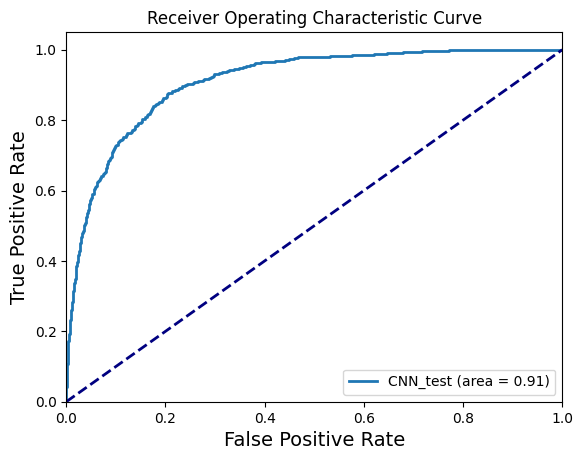

In [57]:
roc_curve(y_pred, y_label, "CNN_test.png", "CNN_test")

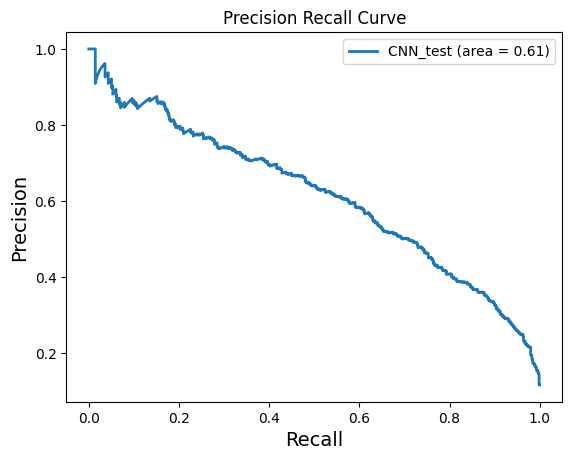

In [58]:
prauc_curve(y_pred, y_label, "CNN_test.png", "CNN_test")

# 수고하셨습니다.